# Student Performance: Predicting Student's Math Score

The goal of this notebook is to apply what I have previously learned from courses with regards to machine learning. For this, we will be evaluating the dataset of student performance and create a conclusive statement as to how features presented in the dataset could affect the math scores of our students.

Below we have written the necessary Python code for setting up our notebook, which includes the importation of the necessary libraries.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plot

import os
for dirname, _, filenames in os.walk('/kaggle/input/students-performance-in-exams'):
    for filename in filenames:
        file_path = (os.path.join(dirname, filename))
        dataframe = pd.read_csv(file_path)
        dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Preprocessing

Upon loading our dataframe from the CSV file, we have to **preprocess our data**. For this case, we will *analyze the content of our dataframe if empty/null cells exist*, and if there are, use **KNNImputer Transformation** functions to fill in the missing data. For our current dataframe, no empty/null cell exist so we can now move on to the next step of our development.

In [2]:
dataframe.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Using generics, we will replace the spaces ( ) from all features and slash (/) from the race/ethnicity feature column with underscore (_)

In [3]:
dataframe.columns = [column.replace("/", "_") for column in dataframe.columns]
dataframe.columns = [column.replace(" ", "_") for column in dataframe.columns]
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Visualization

For this phase, we will visualize our data using **histograms** and **heatmaps** to check for overall distribution and correlations between our different dataset features. This is an important step as it allows us to fully understand our dataset as a whole, and modify it to fully accomplish the task at hand. For this, we will use **Matplotlib** and **Seaborn** libraries to accomplish these tasks.

### Histograms

Histograms visualize the distribution of data in our dataset. Note that our histograms are only displaying results from our dataset's numerical data which are the math_score, reading_score, and writing_score

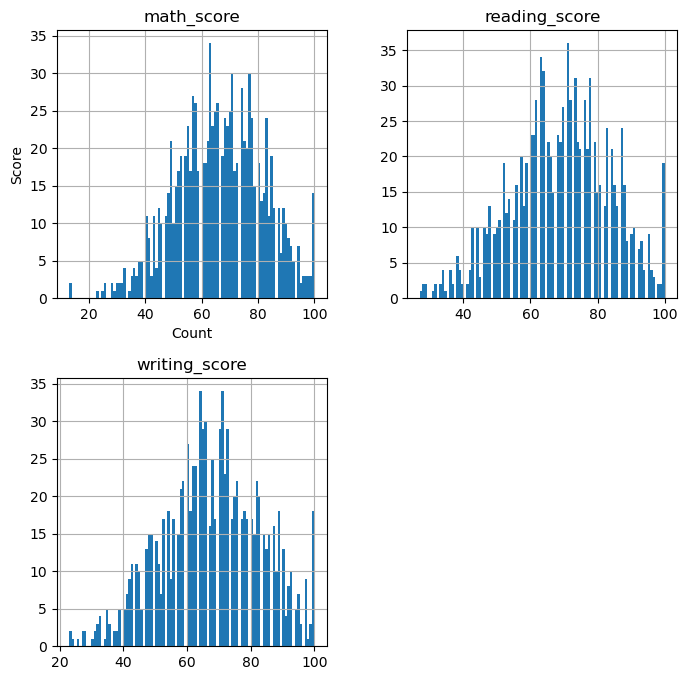

In [4]:
histogram_plots = dataframe.hist( bins = 100, figsize = (8,8))
for his_plot in histogram_plots.flatten():
    his_plot.set_xlabel('Count')
    his_plot.set_ylabel('Score')
    break

### Heatmaps

To visualize our dataframe's numerical data in heatmaps, we have to first identify the correlational relationships of our features using regression analysis. The values would then be used to layout a heatmap.

In [5]:
dataframe_numerics = dataframe.select_dtypes(include = (np.number))
correlational_values = dataframe.corr(numeric_only = True)
print(correlational_values)

               math_score  reading_score  writing_score
math_score       1.000000       0.819398       0.805944
reading_score    0.819398       1.000000       0.954274
writing_score    0.805944       0.954274       1.000000


Note that our heatmaps are showing results from our dataframe's numerical data, which are math_score, writing_score, and reading_score

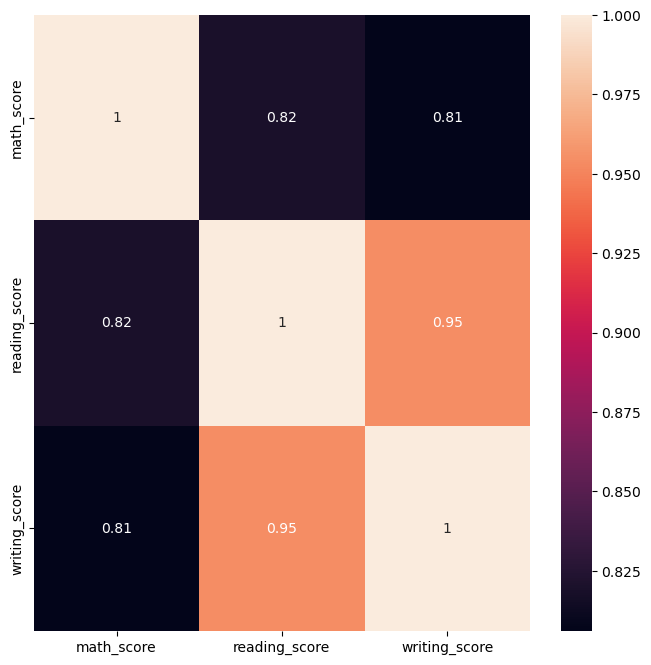

In [6]:
plot.figure(figsize =(8,8))

sns.heatmap(correlational_values, annot = True)
plot.show()

## Feature Engineering

With the help of our data now properly visualize, we can conclude in two things: first, the majority of our features are categorical in nature and needs to be encode into numerical format for our model to use for training; and second, we have two numerical features: reading_score and writing_score that are highly correlated making them candidates for removal or merging. Highly correlated features teach our model the same things, so to ensure an optimized model training it is necessary to remove one of them, or even better, combine them into one single feature.

### Adding, Modifying, and Deleting Features

First, we will modify the writing_score and reading_score features into one single feature due to the fact that they are highly correlated.

In [7]:
# Create a ratio between the writing and reading scores
dataframe['reading_writing_score_ratio'] = dataframe['reading_score']/dataframe['writing_score']

# Drops the reading and writing scores features
dataframe = dataframe.drop('reading_score', axis = 1)
dataframe = dataframe.drop('writing_score', axis = 1)

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_writing_score_ratio  1000 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


### Encoding of Categorical Data to Numerical Data

Finally, we will encode our categorical features - gender, race/ethnicity, parental level of education, lunch, and test preparation course - into numerical features using Pandas.

In [8]:
#Categorical features present in our dataframe
dataframe_categoricals = dataframe.select_dtypes('object')
dataframe_categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [9]:
# Shows unique values for each categorical feature
dataframe_categoricals.to_numpy()

array([['male', 'group A', 'high school', 'standard', 'completed'],
       ['female', 'group D', 'some high school', 'free/reduced', 'none'],
       ['male', 'group E', 'some college', 'free/reduced', 'none'],
       ...,
       ['female', 'group C', 'some high school', 'free/reduced', 'none'],
       ['female', 'group C', 'some college', 'standard', 'none'],
       ['male', 'group A', 'some college', 'standard', 'completed']],
      dtype=object)

In [10]:
# Check count for each unique value for each feature
column_names = dataframe_categoricals.columns
for column in column_names:
    print(f"\n{column.upper()} Feature")
    print(dataframe[column].value_counts())


GENDER Feature
male      517
female    483
Name: gender, dtype: int64

RACE_ETHNICITY Feature
group C    323
group D    262
group B    205
group E    131
group A     79
Name: race_ethnicity, dtype: int64

PARENTAL_LEVEL_OF_EDUCATION Feature
some college          222
associate's degree    203
high school           202
some high school      191
bachelor's degree     112
master's degree        70
Name: parental_level_of_education, dtype: int64

LUNCH Feature
standard        652
free/reduced    348
Name: lunch, dtype: int64

TEST_PREPARATION_COURSE Feature
none         665
completed    335
Name: test_preparation_course, dtype: int64


In [11]:
# Shows probable new features as dummies if each feature are encoded into numerical data with binary values, referring to either True (1), or False (0)
for column in column_names:
    print(f"\n{column.upper()} Feature")
    print(pd.get_dummies(dataframe[column]))


GENDER Feature
     female  male
0         0     1
1         1     0
2         0     1
3         0     1
4         0     1
..      ...   ...
995       0     1
996       0     1
997       1     0
998       1     0
999       0     1

[1000 rows x 2 columns]

RACE_ETHNICITY Feature
     group A  group B  group C  group D  group E
0          1        0        0        0        0
1          0        0        0        1        0
2          0        0        0        0        1
3          0        1        0        0        0
4          0        0        0        0        1
..       ...      ...      ...      ...      ...
995        0        0        1        0        0
996        0        0        0        1        0
997        0        0        1        0        0
998        0        0        1        0        0
999        1        0        0        0        0

[1000 rows x 5 columns]

PARENTAL_LEVEL_OF_EDUCATION Feature
     associate's degree  bachelor's degree  high school  master's deg

With the information we have, we can now move on in encoding our features into numerical values of binary nature using the Pandas get_dummies() function

In [12]:
dataframe_encoded = pd.get_dummies(data = dataframe, columns = column_names)
dataframe_encoded.head()

,math_score,reading_writing_score_ratio,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,67,1.063492,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,40,1.072727,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1
2,59,1.200000,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1
3,77,1.147059,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
4,78,1.073529,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0


In [13]:
dataframe_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   math_score                                      1000 non-null   int64  
 1   reading_writing_score_ratio                     1000 non-null   float64
 2   gender_female                                   1000 non-null   uint8  
 3   gender_male                                     1000 non-null   uint8  
 4   race_ethnicity_group A                          1000 non-null   uint8  
 5   race_ethnicity_group B                          1000 non-null   uint8  
 6   race_ethnicity_group C                          1000 non-null   uint8  
 7   race_ethnicity_group D                          1000 non-null   uint8  
 8   race_ethnicity_group E                          1000 non-null   uint8  
 9   parental_level_of_education_associate's de

With that the feature engineering of our dataset is now complete. We will show a full visualization of our updated dataframe.

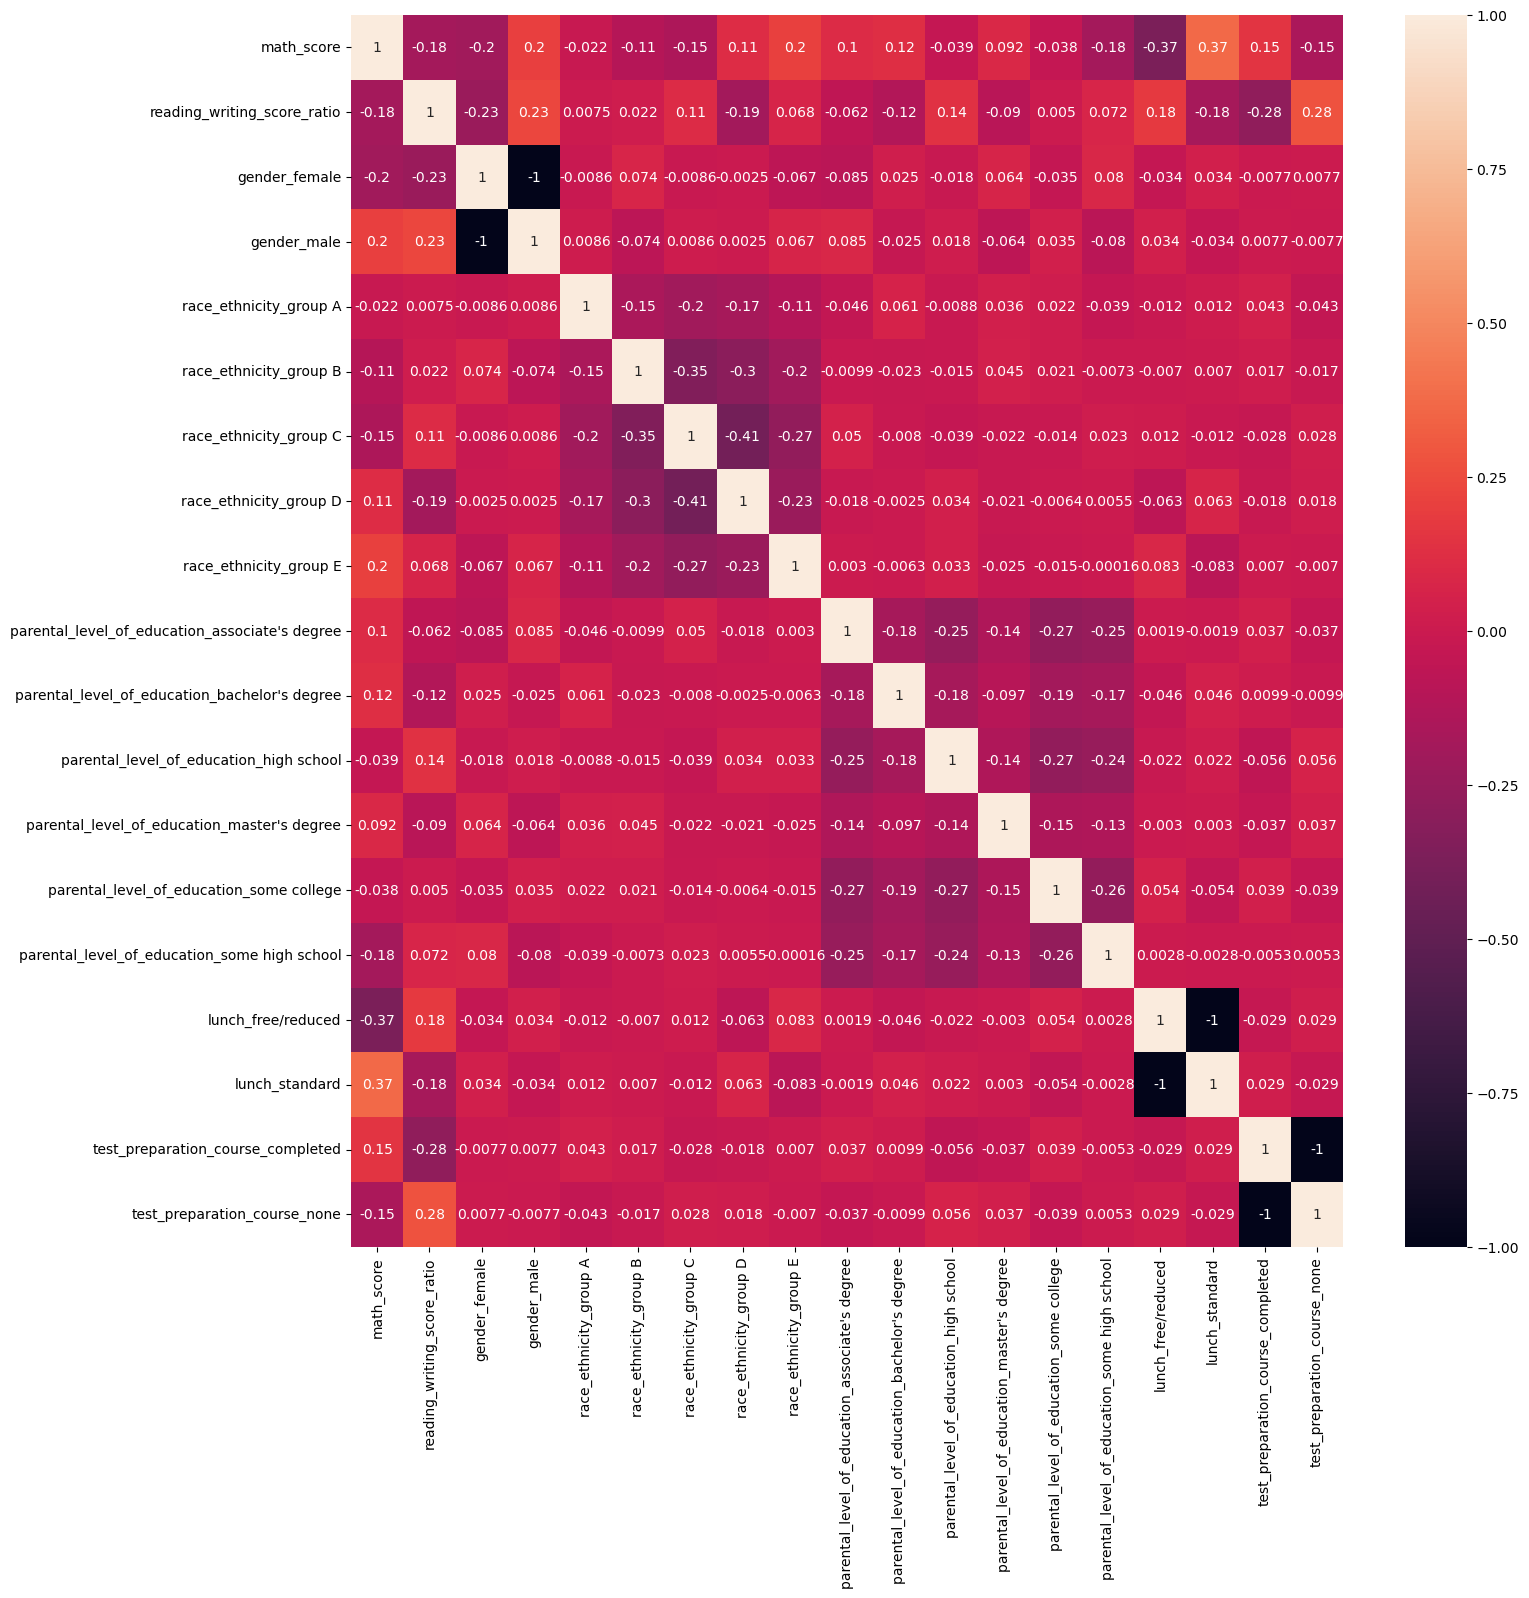

In [14]:
correlation = dataframe_encoded.corr()

plot.figure(figsize = (16,16))
sns.heatmap(correlation, annot = True)
plot.show()